# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yhacoupian/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env enviroment variables
load_dotenv("news_api_keys.env")
# Read your api key environment variable
api_key = os.getenv("news_app")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")


In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

In [8]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,-0.044164,0.043150,0.051620,0.905240
std,0.396021,0.062304,0.057593,0.080008
min,-0.762700,0.000000,0.000000,0.718000
25%,-0.307000,0.000000,0.000000,0.849250
50%,0.000000,0.000000,0.060000,0.924000
75%,0.134275,0.070750,0.086250,1.000000
max,0.840200,0.282000,0.213000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.043617,0.04941,0.037270,0.903310
std,0.347716,0.05792,0.057372,0.121679
min,-0.868900,0.00000,0.000000,0.000000
25%,-0.241150,0.00000,0.000000,0.862500
50%,0.000000,0.04050,0.000000,0.928500
75%,0.318200,0.07650,0.068250,1.000000
max,0.778300,0.24600,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)  
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean) 
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
nltk.download('wordnet')

bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yhacoupian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.0,1.000,"[illustration, alex, castro, verge, cryptocurr..."
3,"Last week, whenElon Musk tweeted that he had s...",0.4754,0.075,0.0,0.925,"[last, week, whenelon, musk, tweeted, spoken, ..."
4,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,compound,positive,negative,neutral,tokens
0,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
1,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
2,,0.0000,0.000,0.000,0.000,[]
3,"Ethereum, the second largest cryptocurrency af...",-0.2732,0.000,0.068,0.932,"[ethereum, second, largest, cryptocurrency, bi..."
4,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_ngram = ngrams(tokenizer(bitcoin_df.text.str.cat()), n=2)
Counter(btc_ngram).most_common(10)

[(('charsby', 'reuters'), 13),
 (('virtual', 'currency'), 13),
 (('elon', 'musk'), 11),
 (('illustration', 'taken'), 10),
 (('previous', 'closebitcoin'), 9),
 (('closebitcoin', 'world'), 9),
 (('world', 'biggest'), 9),
 (('biggest', 'bestknown'), 9),
 (('bos', 'elon'), 8),
 (('currency', 'bitcoin'), 8)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_ngram = ngrams(tokenizer(eth_df.text.str.cat()), n=2)
Counter(eth_ngram).most_common(10)

[(('previous', 'closebitcoin'), 9),
 (('closebitcoin', 'world'), 9),
 (('world', 'biggest'), 9),
 (('biggest', 'bestknown'), 9),
 (('expressed', 'entrepreneur'), 8),
 (('entrepreneur', 'contributor'), 8),
 (('bestknown', 'cryptocurrency'), 8),
 (('charsby', 'reuters'), 8),
 (('illustration', 'taken'), 7),
 (('charsopinions', 'expressed'), 7)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
top_btc_words = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_words, 10)

[('bitcoin', 67),
 ('cryptocurrency', 30),
 ('reuters', 26),
 ('currency', 21),
 ('world', 19),
 ('week', 17),
 ('tesla', 17),
 ('seen', 16),
 ('illustration', 16),
 ('ha', 15)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
top_eth_words = tokenizer(eth_df.text.str.cat())
token_count(top_eth_words, 10)

[('bitcoin', 30),
 ('crypto', 24),
 ('cryptocurrency', 22),
 ('world', 20),
 ('ethereum', 19),
 ('cryptocurrencies', 16),
 ('market', 14),
 ('reuters', 14),
 ('year', 13),
 ('ha', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

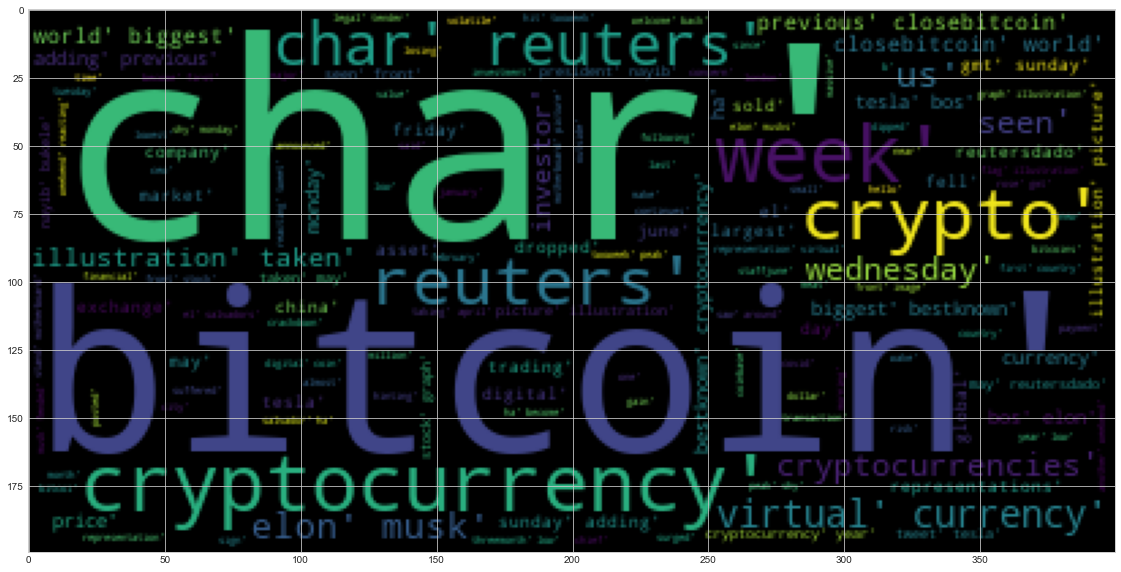

In [22]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)

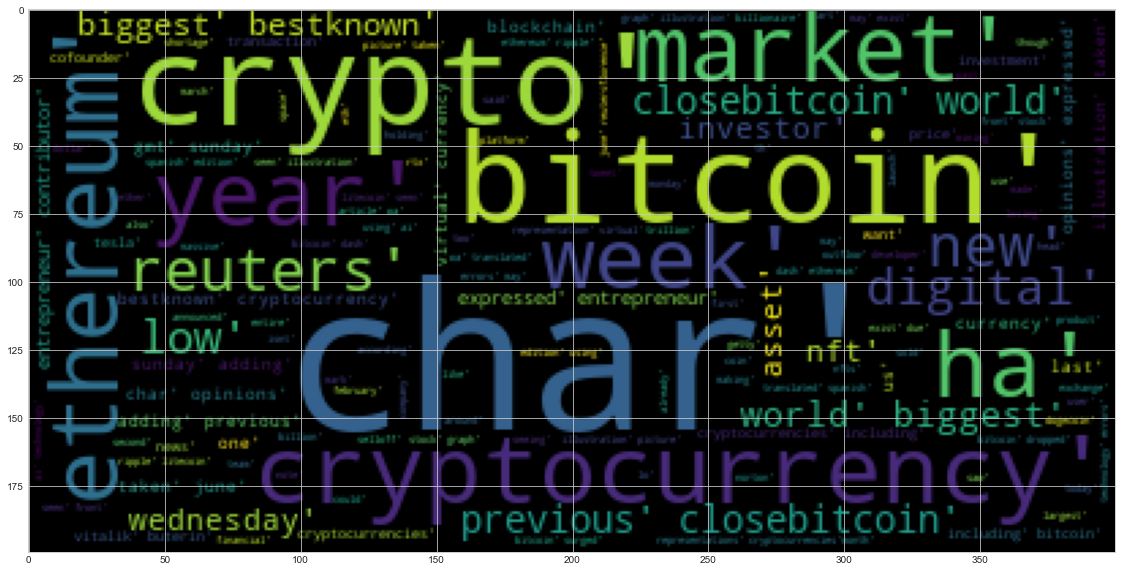

In [23]:
# Generate the Ethereum word cloud
eth_wc = eth_df['tokens'].astype(str)
e_wc = WordCloud().generate(' '.join(eth_wc))
plt.imshow(e_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df['text'].str.cat()
all_btc_text[:1000]

"El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars]Illustration by Alex Castro / The Verge\r\n\n \n\n Cryptocurrency exchange Coinbase is experiencing a “partial” outage this morning for its entire site and application. Additionally, both Coinbase and Bin… [+1307 chars]Last week, whenElon Musk tweeted that he had spoken with the team of Doge developers about how to make the coin more efficient, the impact was predictable: It sent Dogecoin to the moon. It was just t… [+3313 chars]It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, firs

In [28]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER WORD CLOUD"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

["El Salvador's", 'Nayib Bukele', 'Central American', 'Salvador', 'first', 'Nayib Bukele', 'Wednesday', 'Citizens', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', '+1307 chars]Last week', 'Musk', 'Dogecoin', 'Elon Musk', 'Tesla', 'the past few months', 'first', 'Tesla', '$1.5 billion', 'Elon Musk', 'Bitcoin', 'Bitcoin', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'hours-long', 'this morning', 'May 19th', 'US', 'El Salvador', 'first', 'Bitcoin', 'Miami', 'Florida', 'last weekend', 'covid-19', 'Larry Cermak', 'Last week', 'Disney', 'This week', 'Tec', 'PayPals', 'Wednesday', 'Jose Fernandez da Pontethe', 'Mary-Ann RussonBusiness', 'BBC News', 'US', 'Donald Trump', 'Fox Business', 'Bitcoin', 'US', 'Photo', 'Michele Doying', 'Verge', 'Iran', 'Last week', 'Trump', 'This week', 'Elon Musk’s', 'PayPal', 'Soon', 'PayPal', 'U.S.', 'Bitcoin', 'Monday', 'February', 'Elon Musk', 'Tesla', 't

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
all_eth_text = eth_df['text'].str.cat()
all_eth_text[:1000]

"Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko,… [+7156 chars]Bitcoin, Ethereum and a host of Altcoins suffered massive drops Tuesday night and Wednesday morning, erasing months of gains and hundreds of billions in market cap. The overall crypto market shrunk m… [+1182 chars]Ethereum, the second largest cryptocurrency after bitcoin, is just months away from shifting its underlying infrastructure to a new model that would slash its carbon emissions a hundredfold, the proj… [+3301 chars]A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars]GPU shortages and inflated prices have become a byproduct of the growth of cryptomining. Needless to say, that's bad news for the gamers that m

In [32]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER WORD CLOUD"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [34]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['Solana', 'Anatoly Yakovenko', 'Ethereum', 'Altcoins', 'Tuesday night', 'Wednesday', 'morning', 'months', 'hundreds of billions', 'second', 'just months', 'Ethereum', 'February 19, 2021', 'Alex Castro', 'The Verge\r\n\n \n\n Cryptocurrency', 'Coinbase', 'this morning', 'Coinbase', 'Bin', 'Spanish', 'AI', 'Last May', 'Buterin', '27', '99.95%', 'Carl Beekhuizen', 'the Ethereum Foundation', 'Beekhuizen', 'tomorrow', 'Norton', 'Norton', 'Norton Crypto', 'chars]"We', 'Bitcoin', 'U.S. Dollar', 'May 26, 2020', 'Dado Ruvic/File PhotoBitcoin', 'last week', 'one-day', 'March last year', 'Wednesday', '$1 trillion', 'Entrepreneur', 'March 2021', 'more than one million', 'SafeMoon', 'decades', 'Ill', 'Jacks', 'CriddleTechnology', 'Kim Catdarshian', 'Ethereum', 'Spanish', 'AI', 'This week', 'March 2020', 'Tim Berners-Lee', 'NFT', "Sotheby's", 'NFT', 'Ferdman/Getty Images', 'Mark Cuban', 'Ethereum', 'Polygon', 'Polygon', 'tEhereum', 'Last week', 'Trump', 'This week', 'Elon Musk’s', 'Indonesia', 'fir

---